<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework1_part4_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.4 (18 points)

**Learning objectives:**

In this assignment, we will continue our exploration  of statistics and hypothesis testing.  We will explore:

*   Non-parametric statistics
*   The bootstrap


---

## Part 1
Load the same libraries that we used in *Homeworks 1.1 and 1.2*.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `scipy.stats` (as `stats`)

Now is also a good time to set the default font size to 16.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams.update({'font.size': 16})

---

Let's examine the statistical power of parametric and non-parametric statistical tests.  

First, we will compare the 1-sample t-test (parametric) and the sign test (nonparametric).


---
## Part 2 (2 points)

*   Draw a random sample from a standard normal distribution of size `Nsamp = 16`.
*   Use a t-test to determine the p-value for a two-sided test of the null hypothesis that the data were drawn from a population with a hypothesized mean `HypMean = 0.5`.

*   Repeat this procedure 500 times.
*   Find the true positive rate - the proportion of the 500 repetitions in which the null hypothesis (which we know to be **false**) was correctly rejected at an $\alpha$ level of 0.05.



In [13]:
Nsamp = 16
Hypmean=0.5
iti=500
p_val = np.zeros(iti)
for i in range(iti):
  samp = np.random.normal(0,1,Nsamp)
  t_stat,p_val[i] = stats.ttest_1samp(samp,popmean=Hypmean,alternative='two-sided')
tp = np.sum(p_val < 0.05)/np.size(p_val)
print(f'True positive rate: {tp:3f} (effect size 0.5)')

True positive rate: 0.496000 (effect size 0.5)


---
## Part 3 (2 points)

Repeat **Part 2**, but set `HypMean` = 0

*   Find the false positive rate - the proportion of the 500 repetitions in which the null hypothesis (which we know to be **correct**) was incorrectly rejected at an $\alpha$ level of 0.05.


In [14]:
Nsamp = 16
Hypmean=0
iti=500
p_val = np.zeros(iti)
for i in range(iti):
  samp = np.random.normal(0,1,Nsamp)
  t_stat,p_val[i] = stats.ttest_1samp(samp,popmean=Hypmean,alternative='two-sided')
tp = np.sum(p_val < 0.05)/np.size(p_val)
print(f'False positive rate: {tp:3f} (effect size 0.5)')

False positive rate: 0.058000 (effect size 0.5)


---
## Part 4 (2 points)

*   Use similar procedures to find the power (true positive rate) for effect sizes of 0.5 and 1.0 (`HypMean=0.5, 1.0`) as well as the false positive rate (`HypMean=0`) of the 1-sample t-test when `Nsamp` is equal to 4, 8, 16, 32, and 64 at an $\alpha$ level of 0.05.
*   This can be accomplished, for example with three nested `for` loops.
*   Plot the results as shown below using `semilogx`.



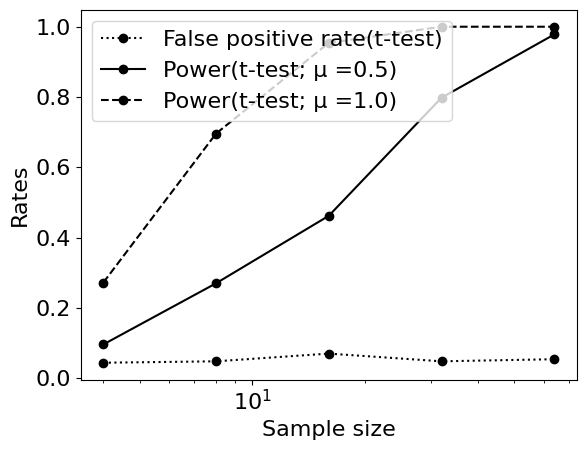

In [15]:
Nsamp = [4,8,16,32,64]
Hypmean=[0.5,1,0]
alpha=0.05
iti=500
tp1 =np.zeros(len(Nsamp))
tp2 =np.zeros(len(Nsamp))
fp =np.zeros(len(Nsamp))
for n in range(len(Nsamp)):
  p_val1= np.zeros(iti)
  p_val2= np.zeros(iti)
  p_val3= np.zeros(iti)
  for i in range(iti):
    samp = np.random.normal(0,1,Nsamp[n])
    t_stat,p_val1[i] = stats.ttest_1samp(samp,popmean=Hypmean[0],alternative='two-sided')
    t_stat,p_val2[i] = stats.ttest_1samp(samp,popmean=Hypmean[1],alternative='two-sided')
    t_stat,p_val3[i] = stats.ttest_1samp(samp,popmean=Hypmean[2],alternative='two-sided')
  tp1[n] = np.sum(p_val1 < alpha)/np.size(p_val1)
  tp2[n] =np.sum(p_val2 < alpha)/np.size(p_val2)
  fp[n] =np.sum(p_val3 < alpha)/np.size(p_val3)

plt.semilogx(Nsamp,fp,'ko:',label='False positive rate(t-test)')
plt.semilogx(Nsamp,tp1,'ko-',label='Power(t-test; \u03BC =0.5)')
plt.semilogx(Nsamp,tp2,'ko--',label='Power(t-test; \u03BC =1.0)')
plt.legend(loc='upper left')
plt.xlabel('Sample size')
plt.ylabel('Rates')
plt.show()

---
##Part 5 (2 points)

Repeat **Part 4**, but use a sign test instead of a t-test.

To perform a sign test:
*   Determine the number of values in the random sample greater than `HypMean`.  Call this number `numPositives`.
*   Use a binomial test (`stats.binomtest`) to determine the probability of observing a value of numPositives at least as extreme as the observed number (a two-tailed test) under the assumption that the probability that each sample is greater than `HypMean` is 0.5.
*   Find the p-value for this test.  

NOTE:  the output of `stats.binomtest` is a structured a little differently than other statistical tests we have used so far.  You may have to look up the documation for `stats.binomtest` to figure out how to access the p-value for the test.


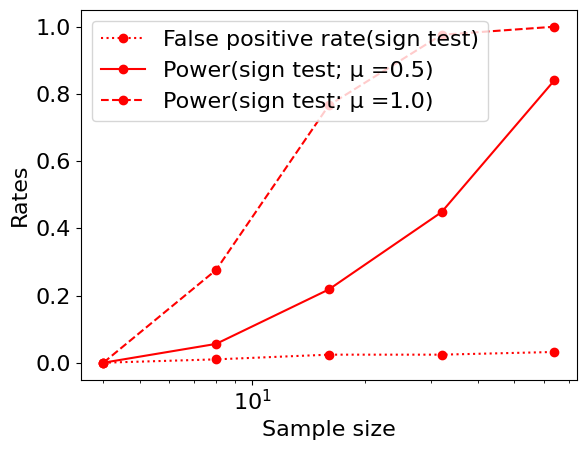

1


In [16]:
Nsamp = [4,8,16,32,64]
Hypmean=[0,0.5,1]
alpha=0.05
iti=500
tp1s =np.zeros(len(Nsamp))
tp2s =np.zeros(len(Nsamp))
fps =np.zeros(len(Nsamp))
for n in range(len(Nsamp)):
  b1 = np.zeros(iti)
  b2 = np.zeros(iti)
  b3 = np.zeros(iti)

  for i in range(iti):
    samp = np.random.normal(0,1,Nsamp[n])
    numPositives =np.sum(samp > Hypmean[0])
    btest = stats.binomtest(k=numPositives,n=Nsamp[n],p=0.5)
    b1[i]=btest.pvalue
    numPositives =np.sum(samp > Hypmean[1])
    btest = stats.binomtest(k=numPositives,n=Nsamp[n],p=0.5)
    b2[i]=btest.pvalue
    numPositives =np.sum(samp > Hypmean[2])
    btest = stats.binomtest(k=numPositives,n=Nsamp[n],p=0.5)
    b3[i]=btest.pvalue
  tp1s[n] = np.sum(b2<alpha)/iti
  tp2s[n] =np.sum(b3<alpha)/iti
  fps[n] =np.sum(b1<alpha)/iti
plt.semilogx(Nsamp,fps,'ro:',label='False positive rate(sign test)')
plt.semilogx(Nsamp,tp1s,'ro-',label='Power(sign test; \u03BC =0.5)')
plt.semilogx(Nsamp,tp2s,'ro--',label='Power(sign test; \u03BC =1.0)')
plt.legend(loc='upper left')
plt.xlabel('Sample size')
plt.ylabel('Rates')
plt.show()
print(np.size(numPositives))

---
##Part 6 (2 points)
*   Plot the results of **Parts 4 and 5** on a common axis
*   Make the plot size large using a command like `fig.set_size_inches(10, 10)

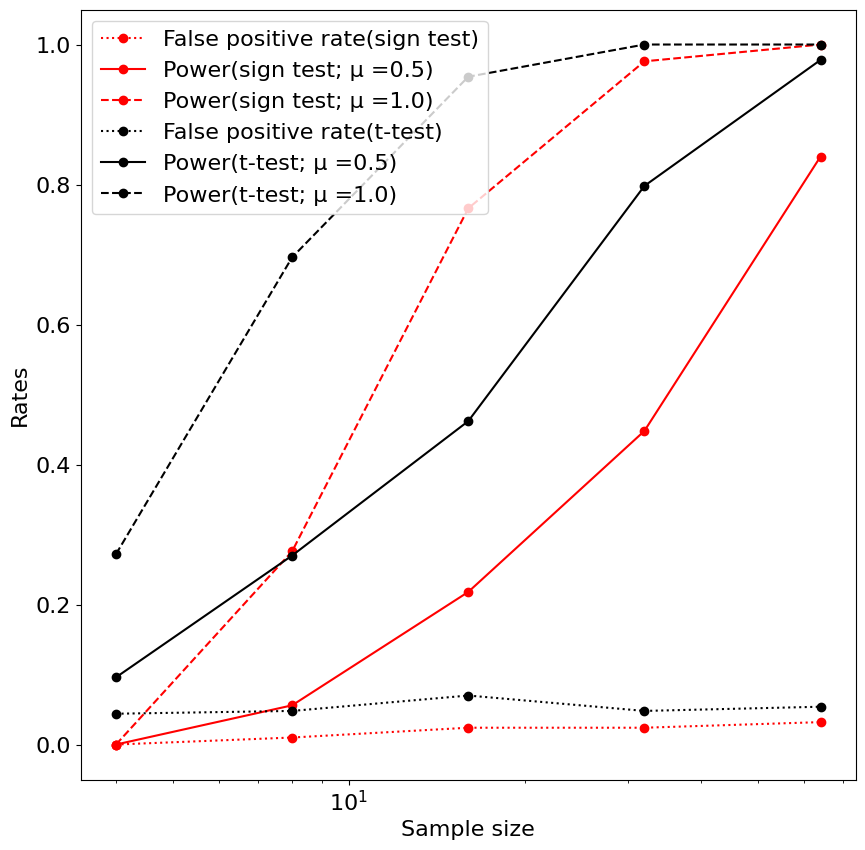

In [17]:
plt.figure(figsize=(10,10))
plt.semilogx(Nsamp,fps,'ro:',label='False positive rate(sign test)')
plt.semilogx(Nsamp,tp1s,'ro-',label='Power(sign test; \u03BC =0.5)')
plt.semilogx(Nsamp,tp2s,'ro--',label='Power(sign test; \u03BC =1.0)')

plt.semilogx(Nsamp,fp,'ko:',label='False positive rate(t-test)')
plt.semilogx(Nsamp,tp1,'ko-',label='Power(t-test; \u03BC =0.5)')
plt.semilogx(Nsamp,tp2,'ko--',label='Power(t-test; \u03BC =1.0)')

plt.legend(loc='upper left')
plt.xlabel('Sample size')
plt.ylabel('Rates')
plt.show()

---
##Part 7 (2 points)

Finally, we'll explore the bootstrap.

*   First, create a population with an unusual distribution.  Use the following code to create the variable `population`:


```
np.random.seed(seed=3)

Nvals1 = 8000
Nvals2 = 2000

vals1 = stats.norm.rvs(loc=-3, scale=1, size=Nvals1)
vals2 = stats.norm.rvs(loc=3, scale=1, size=Nvals2)
population = np.concatenate((vals1, vals2), axis=0)
```

The first command (`np.random.seed(seed=3)`) ensures that the same random numbers are generated each time the code runs.  The number `3` is a bit arbitrary.  We just want to set the seed to the same number each time the code is run.

*   Plot a histogram of values in the population.  Use 50 bins and set `density=True`.





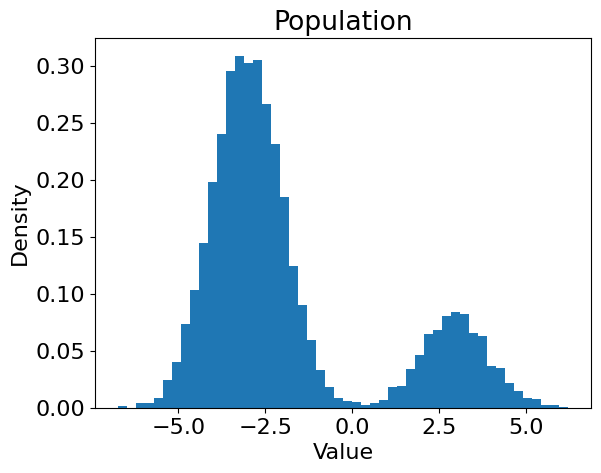

In [18]:
np.random.seed(seed=3)

Nvals1 = 8000
Nvals2 = 2000

vals1 = stats.norm.rvs(loc=-3, scale=1, size=Nvals1)
vals2 = stats.norm.rvs(loc=3, scale=1, size=Nvals2)
population = np.concatenate((vals1, vals2), axis=0)
plt.hist(population,bins=50, density = True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Population')
plt.show()

---
##Part 8 (2 points)

Consider a statistic:  the standard deviation of samples of size `Nsamp=16` drawn from `population`.  What is the sampling distribution of this statistic?

Estimate the sampling distribution using a Monte Carlo Simulation.  
*   Set the random seed to 3 (`np.random.seed(seed=3)`)

*   Draw 16 samples randomly from the population (with replacement) using `np.random.choice`.

*   Find the standard deviation of the sample.

*   Repeat this procedure 10,000 times and store the sample standard deviations in a variable called `sdDistribution`.

*   Plot a histogram of `sdDistribution` as above.




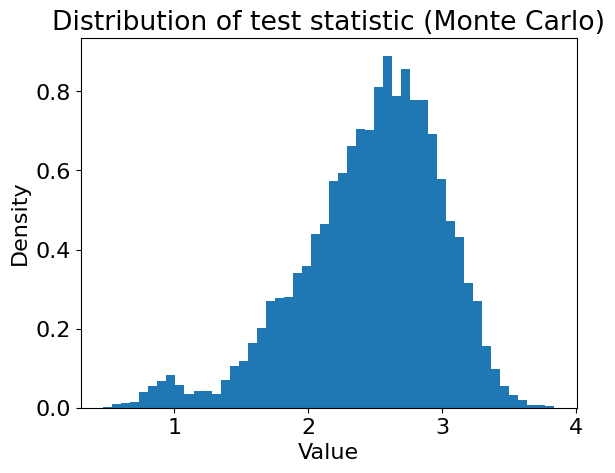

In [19]:
Nsamp=16
np.random.seed(seed=3)
sdDistribution =np.zeros(10000)
for i in range(10000):
  Samp =np.random.choice(population,Nsamp)
  sdDistribution[i] =np.std(Samp)
plt.hist(sdDistribution,bins=50,density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of test statistic (Monte Carlo)')
plt.show()

---
##Part 9 (2 points)

Now, let's try to bootstrap the same distribution.
*   Set the random seed to 3 (`np.random.seed(seed=3)`).
*   Draw only a **single** sample of size `Nsamp=16` from `population`.  Call it `observedData`.

Suppose we don’t have access to `population` and, instead, all we have is `observedData`. We can use the bootstrap method with `observedData` to estimate the distribution of the test statistic.  To do this, do the following:

*    Draw a random sample of size `Nsamp=16` from `observedData`.  Ensure that you sample **with replacement** or else the sample will be the same as `observedData`.  Calculate the standard deviation of this random sample.
*    Resample `observedData` (by repeating the previous step) 10,000 times and calculate the standard deviation each time.  Store the standard deviation values in a variable called `bootDistribution`.  
*    Plot a histogram of both `sdDistribution` and `bootDistribution` in the same way as above.  Set `alpha=0.3` so that the histograms are partially transparent.



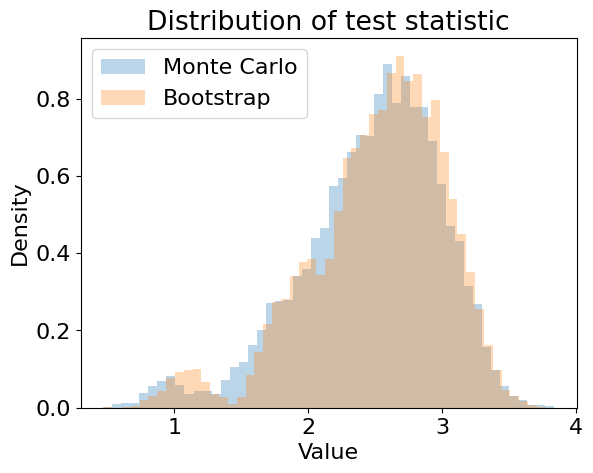

In [20]:
Nsamp=16
np.random.seed(seed=3)
sdData =np.zeros(10000)
observedData =np.random.choice(population,Nsamp)
for i in range(10000):
  sample = np.random.choice(observedData,Nsamp)
  sdData[i] =np.std(sample)
plt.hist(sdDistribution,bins=50,density=True,alpha=0.3,label='Monte Carlo')
plt.hist(sdData,bins=50,density=True,alpha=0.3,label='Bootstrap')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.title('Distribution of test statistic')
plt.show()

---
##Part 10 (2 points)

Find the 5-95% confidence interval on the test statistic (the sample standard deviation) using the Monte Carlo simulution and the bootstrapped distribution.

*   Use `np.percentile` to find the 5th and 95th percentile of `sdDistribution`.
*   Use `np.percentile` to find the 5th and 95th percentile of `bootDistribution`.

In [21]:
a =np.percentile(sdDistribution,(5,95))
b =np.percentile(sdData,(5,95))
print(f'5 - 95% confidence interval:  {a[0]:.3f} - {a[1]:.3f} (Monte Carlo)')
print(f'5 - 95% confidence interval:  {b[0]:.3f} - {b[1]:.3f} (bootstrap)')

5 - 95% confidence interval:  1.522 - 3.208 (Monte Carlo)
5 - 95% confidence interval:  1.619 - 3.216 (bootstrap)
